<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/CS166_Monte_Carlo_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codebook: Exploring Monte Carlo Simulations
Pedro Martins de Bastos

#Q1

In [24]:
import numpy as np

def estimate_pi(trials): #this function takes in the number of trials, and outputs both the estimate for pi and the error (compared to numpy's pi)
  L = 2
  theta = np.random.uniform(low=0, high=1/2*np.pi, size=trials) #I compute a value for theta bounded by 0 and 90 degrees, as specified by the model, from a uniform distribution
  x = np.random.uniform(0, L, size=trials) #computing a value for how far away the center of the needle falls from the closes line!
  test = 1/2*L*np.sin(theta) #creating the value to test against x
  pi = 1/np.mean(x <= test) #converting our estimate to pi!
  return pi, abs(np.pi-pi)

num_trials = [10**i for i in range(1, 9)] #creating a list of 9 values, from 10**1 to 10**8

#for each number of trials in num_trials, compute an estimate for pi:
estimate = []for 
for j in num_trials:
   _, est= estimate_pi(j)
   estimate.append(est)


In [27]:
estimate_pi(100000) #Testing to see if estimate_pi it works!!

(3.121878121878122, 0.019714531711671146)

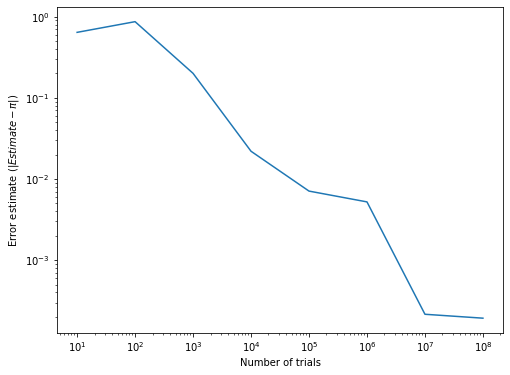

In [35]:
import matplotlib.pyplot as plt

#now that we have our estimates for each number of trials, we can plot with matplotlib:
#note that I use the xscale and yscale to transform to log scale
plt.figure(figsize=(8, 6))
plt.plot(num_trials, estimate)
plt.xlabel("Number of trials")
plt.xscale('log')
plt.ylabel("Error estimate ($|Estimate-\pi|$)")
plt.yscale('log')

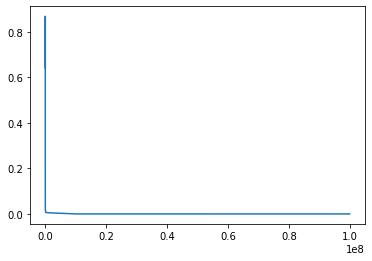

In [30]:
#How does the plot look like in normal scale?
plt.plot(num_trials, estimate)

# Q2

In [51]:
error_or_pi=0 #if this value is 0, the below variables store the estimates for pi. If it is 1, they store the error instead.

e1 = [estimate_pi(200)[error_or_pi] for _ in range(10000)] #using my estimate pi function above and a for loop to produce many different experiments!
e2 = [estimate_pi(2000)[error_or_pi] for _ in range(1000)]
e3 = [estimate_pi(20000)[error_or_pi] for _ in range(100)]
e4 =  [estimate_pi(2000000)[error_or_pi] for _ in range(1)]

3.175061998128274
0.3364215036432942


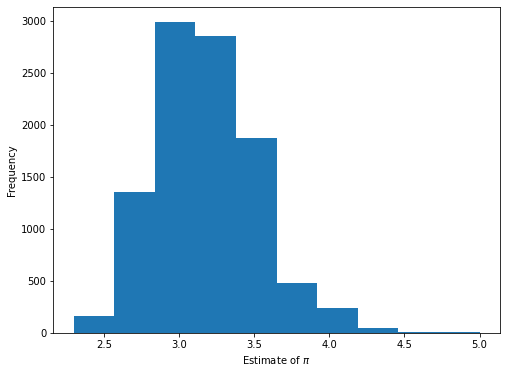

In [46]:
#Now, lets plot only the histogram for 200 trials and 10000 super-experiments
plt.figure(figsize=(8, 6))
plt.xlabel('Estimate of $\pi$')
plt.ylabel('Frequency')
plt.hist(e1)
print(np.mean(e1))
print(np.std(e1))


3.1509286487408925
0.10555480700174293


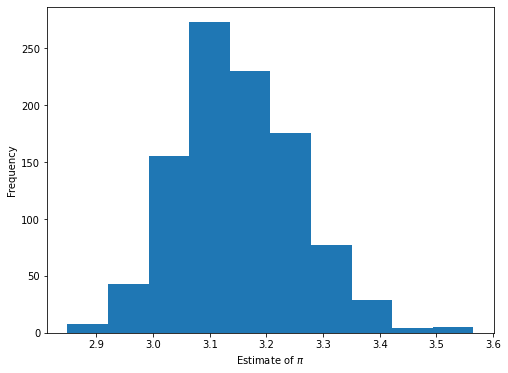

In [44]:
#Now for 2000 trials and 1000 super-experiments
plt.figure(figsize=(8, 6))
plt.xlabel('Estimate of $\pi$')
plt.ylabel('Frequency')
plt.hist(e2)
print(np.mean(e2))
print(np.std(e2))

3.1463345275510783
0.03285748488895909


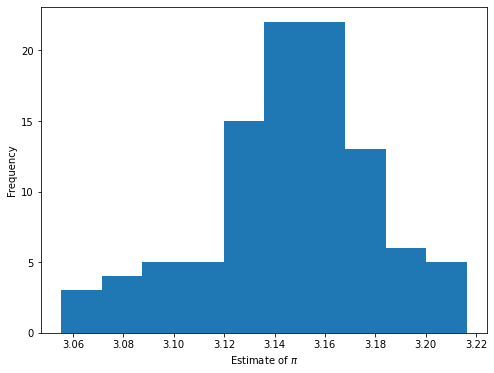

In [45]:
#finally for 20000 trials and 100 experiments
plt.figure(figsize=(8, 6))
plt.xlabel('Estimate of $\pi$')
plt.ylabel('Frequency')
plt.hist(e3)
print(np.mean(e3))
print(np.std(e3))

3.141418821810871
0.0


[3.141418821810871]

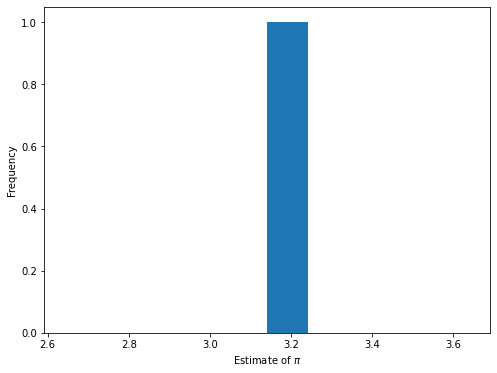

In [53]:
#What if we do only one experiment and 2000000 trials???
plt.figure(figsize=(8, 6))
plt.xlabel('Estimate of $\pi$')
plt.ylabel('Frequency')
plt.hist(e4)
print(np.mean(e4))
print(np.std(e4))
e4

My function only produced one estimate for pi, so we can't really have a histogram! But the estimate seems to be closer than any of those before!

# Q3

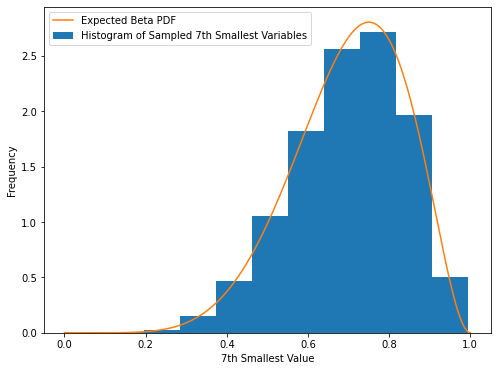

In [59]:
import scipy.stats as sts

x = np.linspace(0, 1, num=200)
k = 7
n = 9
alpha = k
beta = n + 1 - k

samples = np.random.uniform(size=(n, 100000)) #sampling n values 100000 times
samples.sort(axis=0) #sorting my samples!
samples = samples[k-1,:] #k-1 because python uses zero-indexing

plt.figure(figsize=(8, 6))
plt.hist(samples, density=True, label='Histogram of Sampled 7th Smallest Variables')
plt.plot(x, sts.beta.pdf(x, alpha, beta), label='Expected Beta PDF') #using scipy for the pdf!
plt.xlabel('7th Smallest Value')
plt.ylabel('Frequency')
plt.legend()

In [66]:
#Extra exploration: what if we run bayesian inference on the samples, do we get a beta distribution with the parameters we expect from theory?
#Apologies, I know this takes ages to run!!
import pystan


#Defining and compiling my model below:
stan_code = """


data {  
    int<lower=0> num;  //number of calls
    real<lower=0> samples[num]; //defining a list rather than a sole real
}


parameters {
    real<lower=0,upper=20> a; //60 was arbitrary, I though it is big enough
    real<lower=0,upper=20> b;
                              
}


model {
    a ~ cauchy(7, 5);  // prior over lambda
    b ~ cauchy(3, 5);
    for(i in 1:num)
      samples[i] ~ beta(a, b); //likelihood
}

"""

stan_model = pystan.StanModel(model_code=stan_code) #Compiling the model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ef867c28142c5edf4020d961a2ae22c7 NOW.


In [74]:
#Sampling my model's parameters based on the data:
stan_data = {'num':len(samples[0:3000]), 'samples':samples[0:3000]}

stan_results = stan_model.sampling(data=stan_data) #Inputting data

In [73]:
#printing the results!
print(stan_results)

Inference for Stan model: anon_model_ef867c28142c5edf4020d961a2ae22c7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      7.18  4.5e-3   0.14   6.91   7.09   7.18   7.27   7.47    993    1.0
b      3.05  1.8e-3   0.06   2.94   3.01   3.05   3.09   3.17    986    1.0
lp__ 3046.1    0.03   0.99 3043.4 3045.8 3046.5 3046.8 3047.1    964    1.0

Samples were drawn using NUTS at Wed Mar  3 04:04:49 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


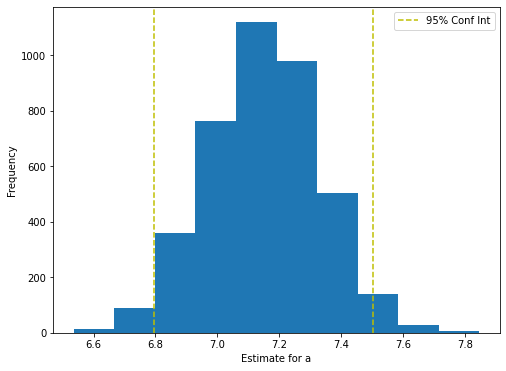

In [87]:
#Now, lets plot the values for a as well as the 95% conf int:
results = stan_results.extract()
plt.figure(figsize=(8, 6))
plt.hist(results['a'])
intervals = np.quantile(results['a'], (0.025, 0.975))
plt.axvline(x = intervals[0], ls='--', color = "y", label='95% Conf Int')
plt.axvline(x=intervals[1], ls="--", color = 'y')
plt.xlabel('Estimate for a')
plt.ylabel('Frequency')
plt.legend()

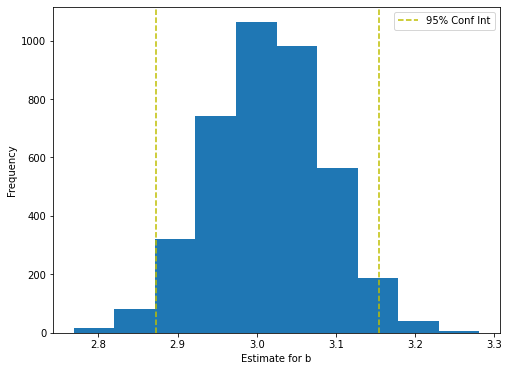

In [88]:
#lets plot the value for b as well as the 95% conf it:
plt.figure(figsize=(8, 6))
plt.hist(results['b'])
intervals = np.quantile(results['b'], (0.025, 0.975))
plt.axvline(x = intervals[0], ls='--', color = "y", label='95% Conf Int')
plt.axvline(x=intervals[1], ls="--", color = 'y')
plt.xlabel('Estimate for b')
plt.ylabel('Frequency')
plt.legend()

# Q4

In [60]:
#First, I transcribed the matrix. 

#The below values I obtained from Mathematica (by solving the simple equations) and thus pasted them here! (There are certainly ways to do this in python but Mathematica rules!)
c0 = (-1 + 2*np.e**3)/(2*np.e**3)
c2 = (-1 + np.e)/(2*np.e)
c3 = (-1 + 2*np.e)/(2*np.e)

chain = np.asarray([[c0, 1/2*np.e**-3, 0, 0], [1/2, 0, 1/2, 0], [0, 1/2*np.e**-1, c2, 1/2], [0, 0, 1/2*np.e**-1, c3]])

In [ ]:
#I start off with a vector of all ones
init = np.asarray([1, 1,  1, 1])
for i in range(1000):
  result = np.matmul(init, chain) #right multiplying the vector with the Matrix
  init = result

print(result/np.sum(result)) #normalizing the vector before I print it! (If I don't, it becomes hard to compare with the eigenvector below)

[0.64391426 0.0320586  0.08714432 0.23688282]


In [61]:
#finding the eigenvector with numpy!
eigenvectors = np.linalg.eig(np.transpose(chain))
eigenvectors = eigenvectors[1] #grabing the eigenvectors and not the eigenvalues
eigenvectors = eigenvectors[:,2]/np.sum(eigenvectors[:,2]) #grabbing the correct eigenvector (that corresponds to the eigenvalue of 1) and normalizing it for comparisson
print(eigenvectors)

array([0.64391426, 0.0320586 , 0.08714432, 0.23688282])